# Library Import

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

Data Loading

In [2]:
import keras

(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


In [3]:
cifar100_train_images = cifar100_train_images.astype('float32') / 255.0
cifar100_test_images = cifar100_test_images.astype('float32') / 255.0

In [4]:
x_train_flat = cifar100_train_images.reshape((cifar100_train_images.shape[0], 32 * 32 * 3))
x_test_flat = cifar100_test_images.reshape((cifar100_test_images.shape[0], 32 * 32 * 3))

In [5]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train and y_test are loaded CIFAR-100 labels with shape (N, 1)
# One-hot encode labels (100 classes)
y_train_onehot = to_categorical(cifar100_train_labels, num_classes=100)
y_test_onehot = to_categorical(cifar100_test_labels, num_classes=100)

print("One-hot encoded training labels shape:", y_train_onehot.shape)
print("One-hot encoded testing labels shape:", y_test_onehot.shape)

One-hot encoded training labels shape: (50000, 100)
One-hot encoded testing labels shape: (10000, 100)


In [6]:
print("Training images shape:", x_train_flat.shape)
print("Testing images shape:", x_test_flat.shape)
print("Training labels shape:", y_train_onehot.shape)
print("Testing labels shape:", y_test_onehot.shape)

Training images shape: (50000, 3072)
Testing images shape: (10000, 3072)
Training labels shape: (50000, 100)
Testing labels shape: (10000, 100)


# **Model Building**

**Basic ANN**


* Flatten (32×32→3) → 0 params
* Dense (512, ReLU) → 1,573,376 params
* Dense (256, ReLU) → 131,328 params
* Dense (100, Softmax) → 25,700 params




In [7]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,730,404 (6.60 MB)

 Trainable params: 1,730,404 (6.60 MB)

 Non-trainable params: 0 (0.00 B)

Basic **CNN** Model


- **Conv2D (32, 3×3) + MaxPool** → 320 params  
- **Conv2D (64, 3×3) + MaxPool** → 18,496 params  
- **Flatten**  
- **Dense (64, ReLU)** → 262,208 params  
- **Dense (100, Softmax)** → 6,500 params  

**Total params:** ~121K  

In [8]:
basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

basic_cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
basic_cnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 288,100 (1.10 MB)

 Trainable params: 288,100 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

Deeper **CNN**

- Conv2D (32, 3×3) + BN + MaxPool + Dropout → 896 + 64 = 960 params
- Conv2D (64, 3×3) + BN + MaxPool + Dropout → 18,496 + 128 = 18,624 params
- Conv2D (128, 3×3) + BN + MaxPool + Dropout → 73,856 + 256 = 74,112 params
- Flatten -> 0
- Dense (128, ReLU) + BN + Dropout → 262,272 + 256 = 262,528 params
- Dense (100, Softmax) → 	12,900 params

Total params: ~369,124

In [9]:
from tensorflow.keras import models, layers

def build_deeper_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(100, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

deeper_cnn_model = build_deeper_cnn()
deeper_cnn_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369,828 (1.41 MB)

 Trainable params: 369,124 (1.41 MB)

 Non-trainable params: 704 (2.75 KB)

# **Model Training**
**Training ANN**
- **EarlyStopping**: monitors validation loss, stops if no improvement for 5 epochs, restores best weights.  
- **ModelCheckpoint**: saves best ANN weights (`best_ann_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [12]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
model_checkpoint_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_ann_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training ANN model...")
ann_history = ann_model.fit(
    cifar100_train_images,
    y_train_onehot,
    epochs=30,
    batch_size=128,
    validation_data=(cifar100_test_images, y_test_onehot),
    callbacks=[early_stopping, model_checkpoint_ann]
)
print("ANN model training finished.")

Training ANN model...
Epoch 1/30
389/391 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2755 - loss: 2.9158
Epoch 1: val_loss improved from inf to 3.24544, saving model to best_ann_model_weights.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.2755 - loss: 2.9157 - val_accuracy: 0.2351 - val_loss: 3.2454
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2864 - loss: 2.8650
Epoch 2: val_loss did not improve from 3.24544
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.2863 - loss: 2.8650 - val_accuracy: 0.2346 - val_loss: 3.2614
Epoch 3/30
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2878 - loss: 2.8595
Epoch 3: val_loss did not improve from 3.24544
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.2878 - loss: 2.8596 - val_accuracy: 0.2271 - val_loss: 3.3000
Epoch 4/30
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2904 - loss: 2.8383
Epoch 4: val_loss did not improve from 3.24544
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 23

**Training Basic CNN Model**

In [13]:
# Define Basic CNN model
basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Flatten(),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='softmax')   # 100 classes in CIFAR-100
])

# Compile the CNN model
basic_cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callback for saving best CNN model
model_checkpoint_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Basic CNN model...")
basic_cnn_history = basic_cnn_model.fit(
    cifar100_train_images,
    y_train_onehot,
    epochs=30,
    batch_size=128,
    validation_data=(cifar100_test_images, y_test_onehot),
    callbacks=[early_stopping, model_checkpoint_basic_cnn]
)
print("Basic CNN model training finished.")

Training Basic CNN model...
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.0419 - loss: 4.3203
Epoch 1: val_loss improved from inf to 3.60096, saving model to best_basic_cnn_model_weights.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 105ms/step - accuracy: 0.0420 - loss: 4.3196 - val_accuracy: 0.1574 - val_loss: 3.6010
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.1808 - loss: 3.4462
Epoch 2: val_loss improved from 3.60096 to 3.19212, saving model to best_basic_cnn_model_weights.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 101ms/step - accuracy: 0.1809 - loss: 3.4460 - val_accuracy: 0.2243 - val_loss: 3.1921
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.2485 - loss: 3.0818
Epoch 3: val_loss improved from 3.19212 to 2.98302, saving model to best_basic_cnn_model_weights.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.2485 - loss: 3.0817 - val_accuracy: 0.2672 - val_loss: 2.9830
Epoch 4/30
391/391 ━━━━━━━━━━━━

**Training Deeper CNN**

In [14]:
model_checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Deeper CNN model...")
deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),


    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation='softmax')   # 100 classes
])

# Compile the Deeper CNN
deeper_cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

deeper_cnn_history = deeper_cnn_model.fit(
    cifar100_train_images,
    y_train_onehot,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, y_test_onehot),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn]
)
print("Deeper CNN model training finished.")

Training Deeper CNN model...
Epoch 1/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.0201 - loss: 4.4696
Epoch 1: val_loss improved from inf to 4.10820, saving model to best_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 147s 186ms/step - accuracy: 0.0201 - loss: 4.4694 - val_accuracy: 0.0562 - val_loss: 4.1082
Epoch 2/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.0632 - loss: 4.0835
Epoch 2: val_loss improved from 4.10820 to 3.74853, saving model to best_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 148s 189ms/step - accuracy: 0.0632 - loss: 4.0833 - val_accuracy: 0.1166 - val_loss: 3.7485
Epoch 3/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.1090 - loss: 3.7892
Epoch 3: val_loss improved from 3.74853 to 3.49674, saving model to best_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 199s 186ms/step - accuracy: 0.1090 - loss: 3.7890 - val_accuracy: 0.1685 - val_loss: 3.4967
Epoch 4/30
781/782 ━━

# **Model Evalution**

Evaluation Results:
ANN        - Loss: 3.2454, Accuracy: 0.2351
Basic CNN  - Loss: 2.4562, Accuracy: 0.3891
Deeper CNN - Loss: 2.6829, Accuracy: 0.3318


/tmp/ipython-input-4214990448.py:45: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


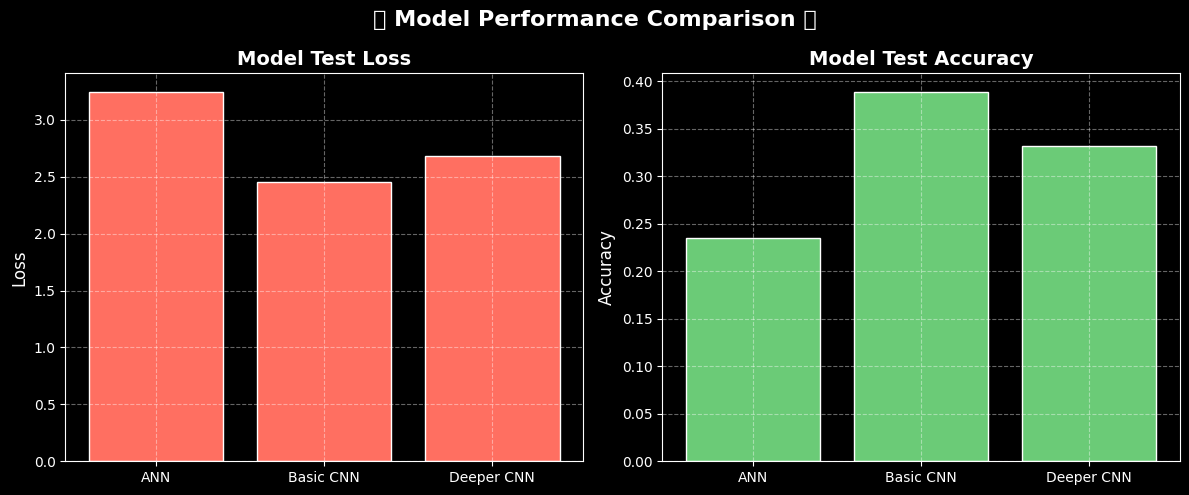

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Load the best saved weights
ann_model.load_weights('best_ann_model_weights.weights.h5')
basic_cnn_model.load_weights('best_basic_cnn_model_weights.weights.h5')
deeper_cnn_model.load_weights('best_deeper_cnn_model_weights.weights.h5')

# Evaluate models on test data
loss_ann, accuracy_ann = ann_model.evaluate(cifar100_test_images, y_test_onehot, verbose=0)
loss_basic_cnn, accuracy_basic_cnn = basic_cnn_model.evaluate(cifar100_test_images, y_test_onehot, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model.evaluate(cifar100_test_images, y_test_onehot, verbose=0)

print("Evaluation Results:")
print(f"ANN        - Loss: {loss_ann:.4f}, Accuracy: {accuracy_ann:.4f}")
print(f"Basic CNN  - Loss: {loss_basic_cnn:.4f}, Accuracy: {accuracy_basic_cnn:.4f}")
print(f"Deeper CNN - Loss: {loss_deeper_cnn:.4f}, Accuracy: {accuracy_deeper_cnn:.4f}")

# Data for plotting
models = ['ANN', 'Basic CNN', 'Deeper CNN']
losses = [loss_ann, loss_basic_cnn, loss_deeper_cnn]
accuracies = [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]

# Dark mode style for better visuals
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

**Model Comparison**

Created a dataframe to store test loss and test accuracy for ANN, Basic CNN, and Deeper CNN.
Plotted training history for each model (accuracy & loss vs. epochs).
Helps compare how models learn and generalize over time.

In [23]:
# Model histories with colors
models = {
    "ANN": ("cyan", ann_history),
    "Basic CNN": ("magenta", basic_cnn_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

# Test performance summary
performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]
}
performance_df = pd.DataFrame(performance_data)

# Create subplot: Accuracy (left) & Loss (right)
fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy (train vs val)
    fig.add_trace(go.Scatter(
        y=history.history['accuracy'],
        mode='lines',
        name=f"{name} - Train",
        line=dict(color=color, dash='solid')
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        y=history.history['val_accuracy'],
        mode='lines',
        name=f"{name} - Val",
        line=dict(color=color, dash='dot')
    ), row=1, col=1)

    # Loss (train vs val)
    fig.add_trace(go.Scatter(
        y=history.history['loss'],
        mode='lines',
        name=f"{name} - Train",
        line=dict(color=color, dash='solid'),
        showlegend=False  # Already shown in accuracy
    ), row=1, col=2)

    fig.add_trace(go.Scatter(
        y=history.history['val_loss'],
        mode='lines',
        name=f"{name} - Val",
        line=dict(color=color, dash='dot'),
        showlegend=False
    ), row=1, col=2)

# Layout
fig.update_layout(
    title_text="📊 Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()


# **Predictions**

/tmp/ipython-input-3212914136.py:55: UserWarning:

Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.

/tmp/ipython-input-3212914136.py:55: UserWarning:

Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.



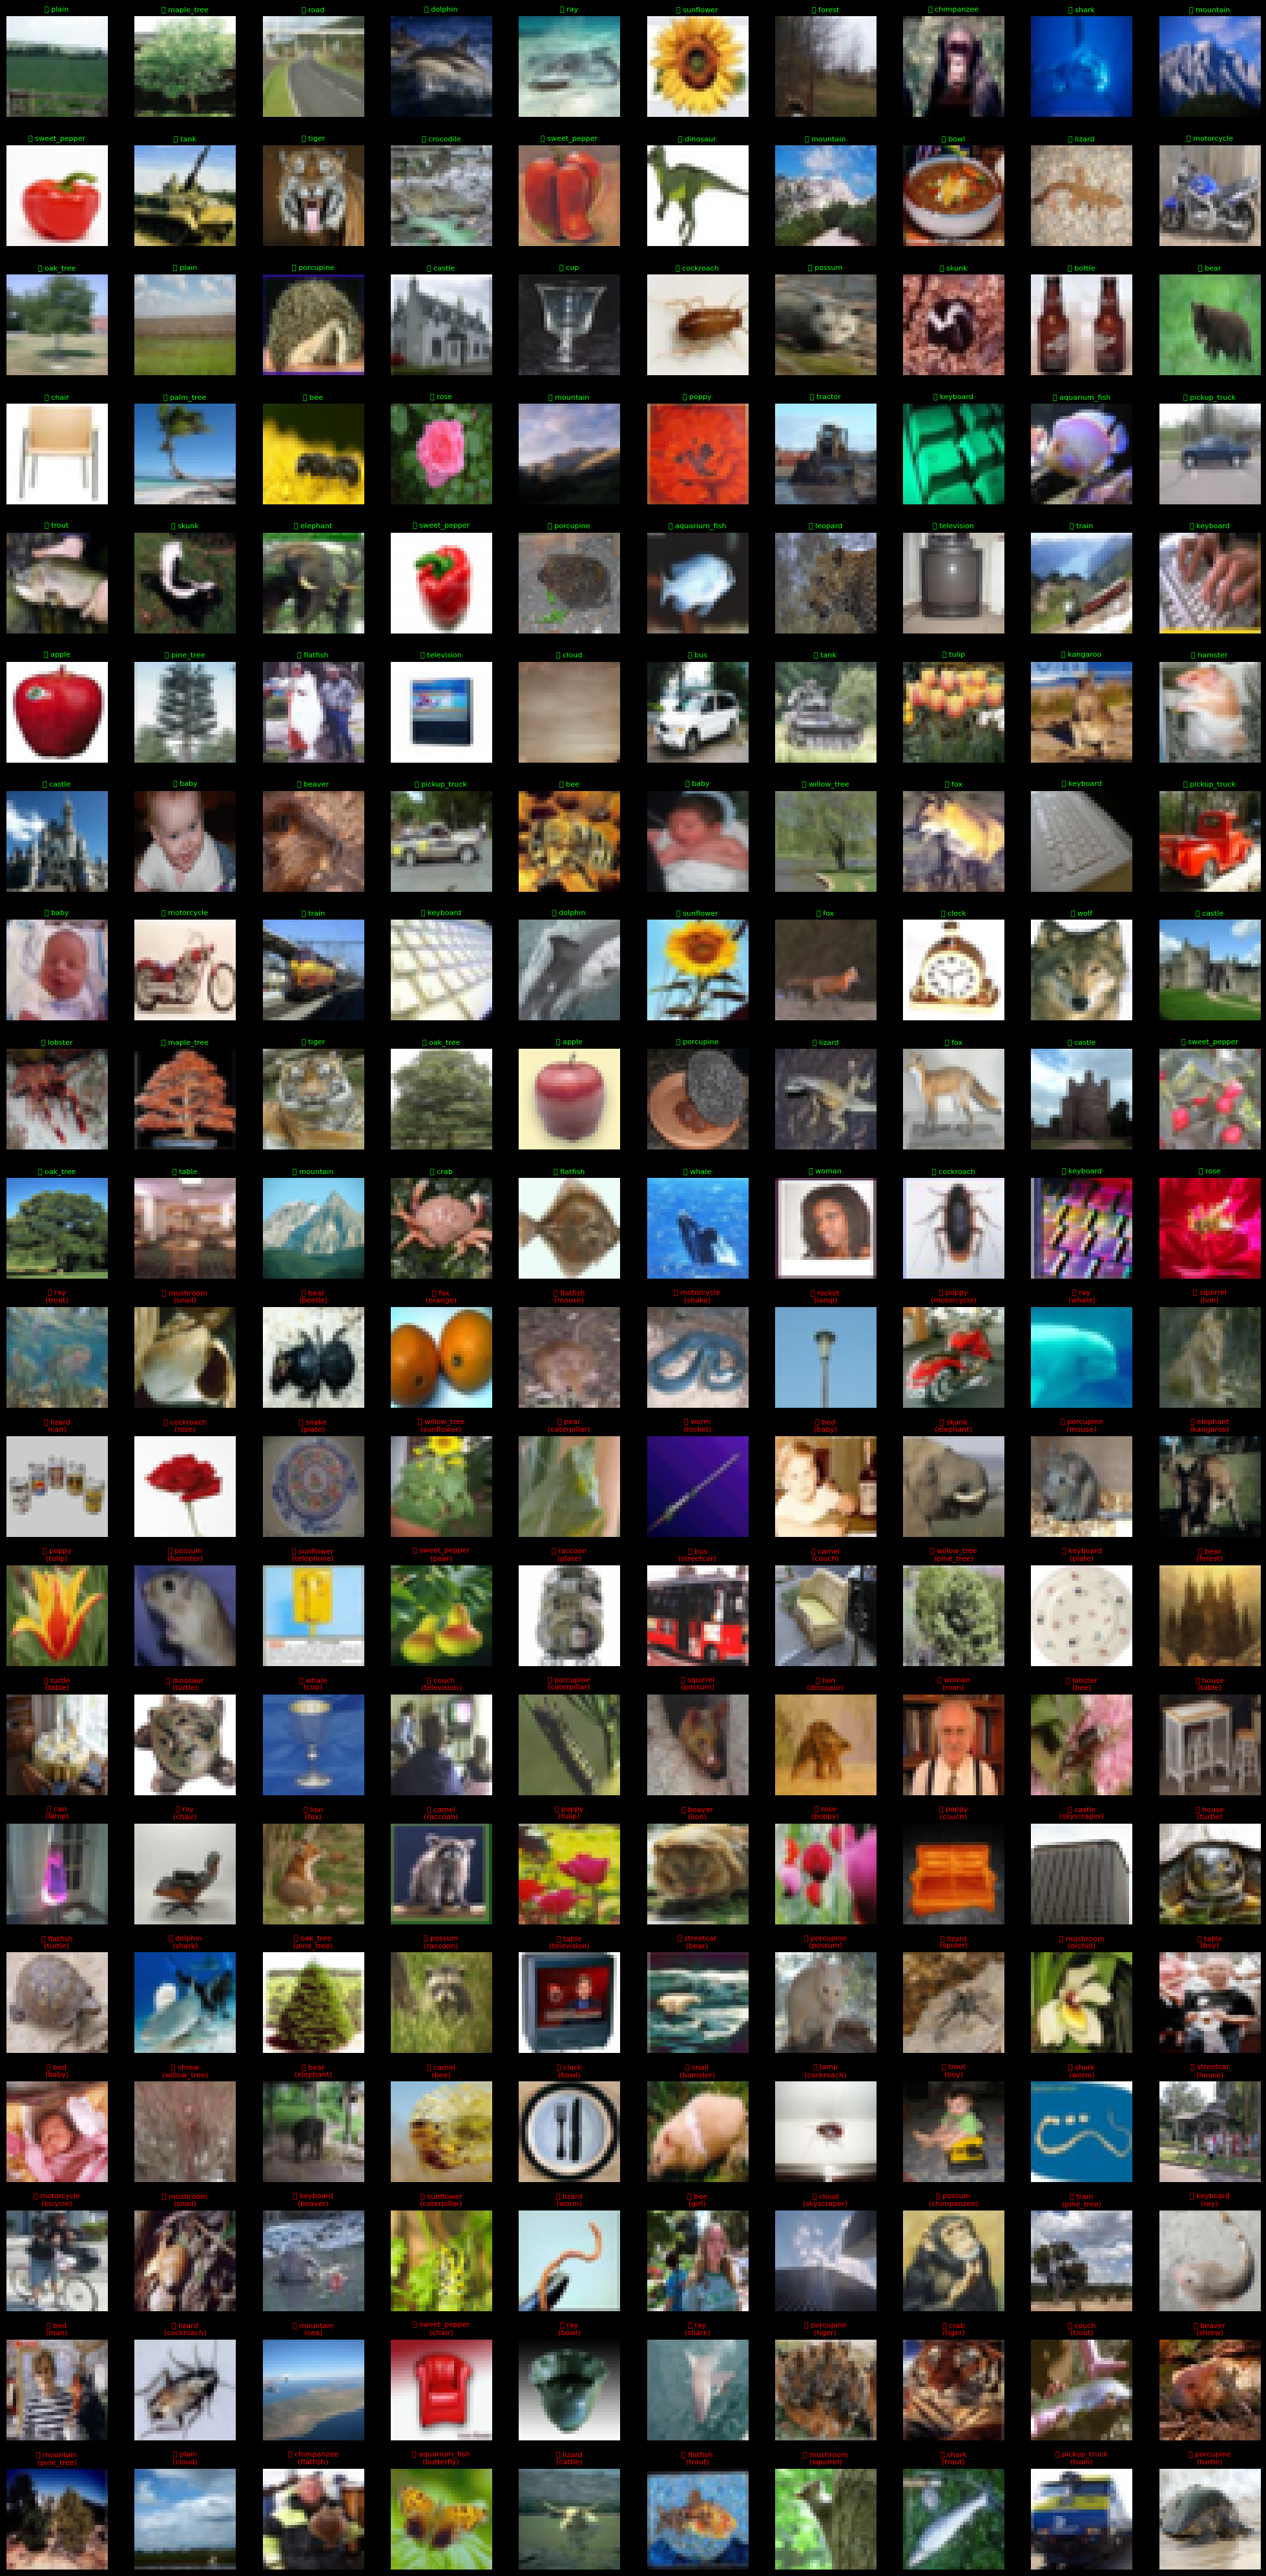

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Load best weights for Basic CNN
basic_cnn_model.load_weights("best_basic_cnn_model_weights.weights.h5")

# Predict on test images
y_pred_probs = basic_cnn_model.predict(cifar100_test_images, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Find correct and incorrect predictions
correct_indices = np.where(y_pred == y_true)[0]
incorrect_indices = np.where(y_pred != y_true)[0]

# Randomly select 100 correct and 100 incorrect samples
selected_correct = np.random.choice(correct_indices, 100, replace=False)
selected_incorrect = np.random.choice(incorrect_indices, 100, replace=False)

# Combine (first 100 correct, then 100 incorrect)
selected_samples = np.concatenate([selected_correct, selected_incorrect])
labels_correctness = ["correct"] * 100 + ["incorrect"] * 100

# CIFAR-100 class names
cifar100_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',
    'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man',
    'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
    'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew',
    'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper',
    'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle',
    'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Plot 20x10 grid
plt.figure(figsize=(20, 40))
for i, (idx, status) in enumerate(zip(selected_samples, labels_correctness)):
    plt.subplot(20, 10, i + 1)
    plt.imshow(cifar100_test_images[idx])
    plt.axis("off")

    pred_label = cifar100_labels[y_pred[idx]]
    true_label = cifar100_labels[y_true[idx]]

    if status == "correct":
        plt.title(f"✅ {pred_label}", color="lime", fontsize=8)
    else:
        plt.title(f"❌ {pred_label}\n({true_label})", color="red", fontsize=8)

plt.tight_layout()
plt.show()

# **Project Summary**
- Dataset: CIFAR-100 → 60,000 images (32×32 RGB), 100 fine classes, 20 superclasses.

**Models Built:**

- ANN (baseline, fully connected)

- Basic CNN (few conv layers)

- Deeper CNN (more conv layers, dropout, batch norm)

- Training Setup: 30 epochs, batch size 128, EarlyStopping + ModelCheckpoint.

- Evaluation: Compared models on test loss & accuracy using bar charts & learning curves.

**Results:**

- ANN → lowest accuracy.

- Basic CNN → better performance.

- Deeper CNN → best accuracy & lowest loss.

**Prediction Visualization:** Displayed 100 correct ✅ (green) & 100 incorrect ❌ (red) predictions in a 20×10 grid.

**Conclusion: **Deeper CNN is most effective.